<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_PCVK/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Nomor 1
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Nomor 2
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
import math
import os
import glob

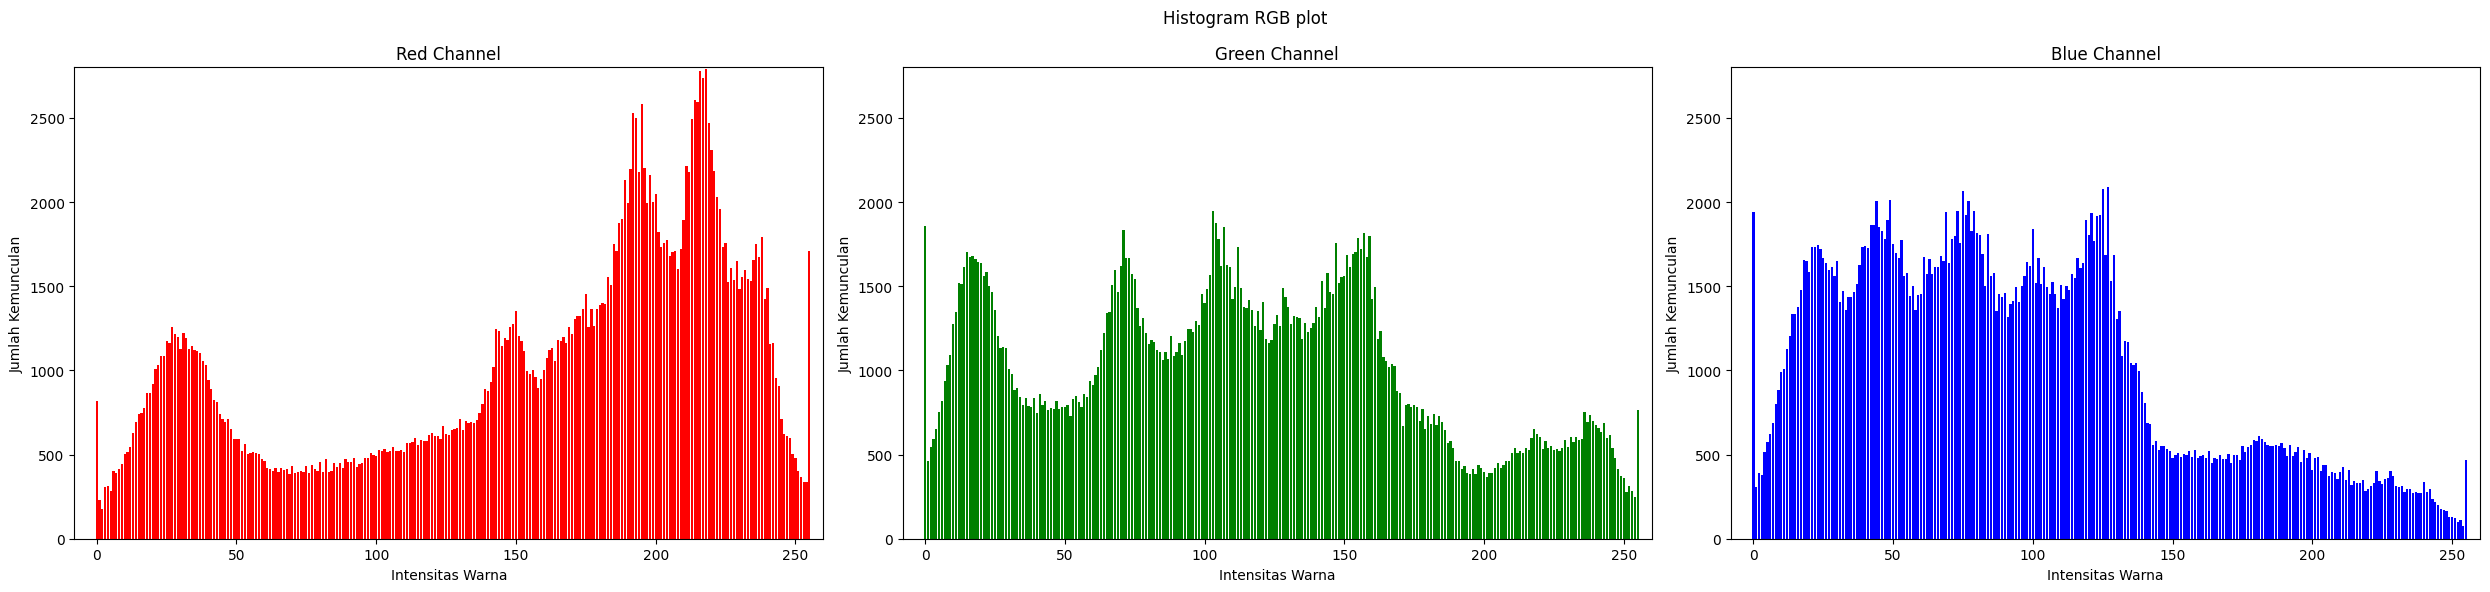

In [ ]:
# Nomor 3

image = cv.imread('/content/drive/MyDrive/Week2/Images/lena.jpg')

channels = cv.split(image)
colors = ('r', 'g', 'b')
channel_names = ['Red', 'Green', 'Blue']

plt.figure(figsize=(25, 6))
plt.suptitle('Histogram RGB plot')

histograms = [cv.calcHist([channel], [0], None, [256], [0, 256]) for channel in channels]

histograms[0], histograms[2] = histograms[2], histograms[0]

for i, histogram in enumerate(histograms):
    plt.subplot(1, 3, i + 1)
    plt.bar(np.arange(256), histogram[:, 0], color=colors[i])
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([-8, 260])
    plt.ylim([0, 2800])

plt.tight_layout()
plt.show()

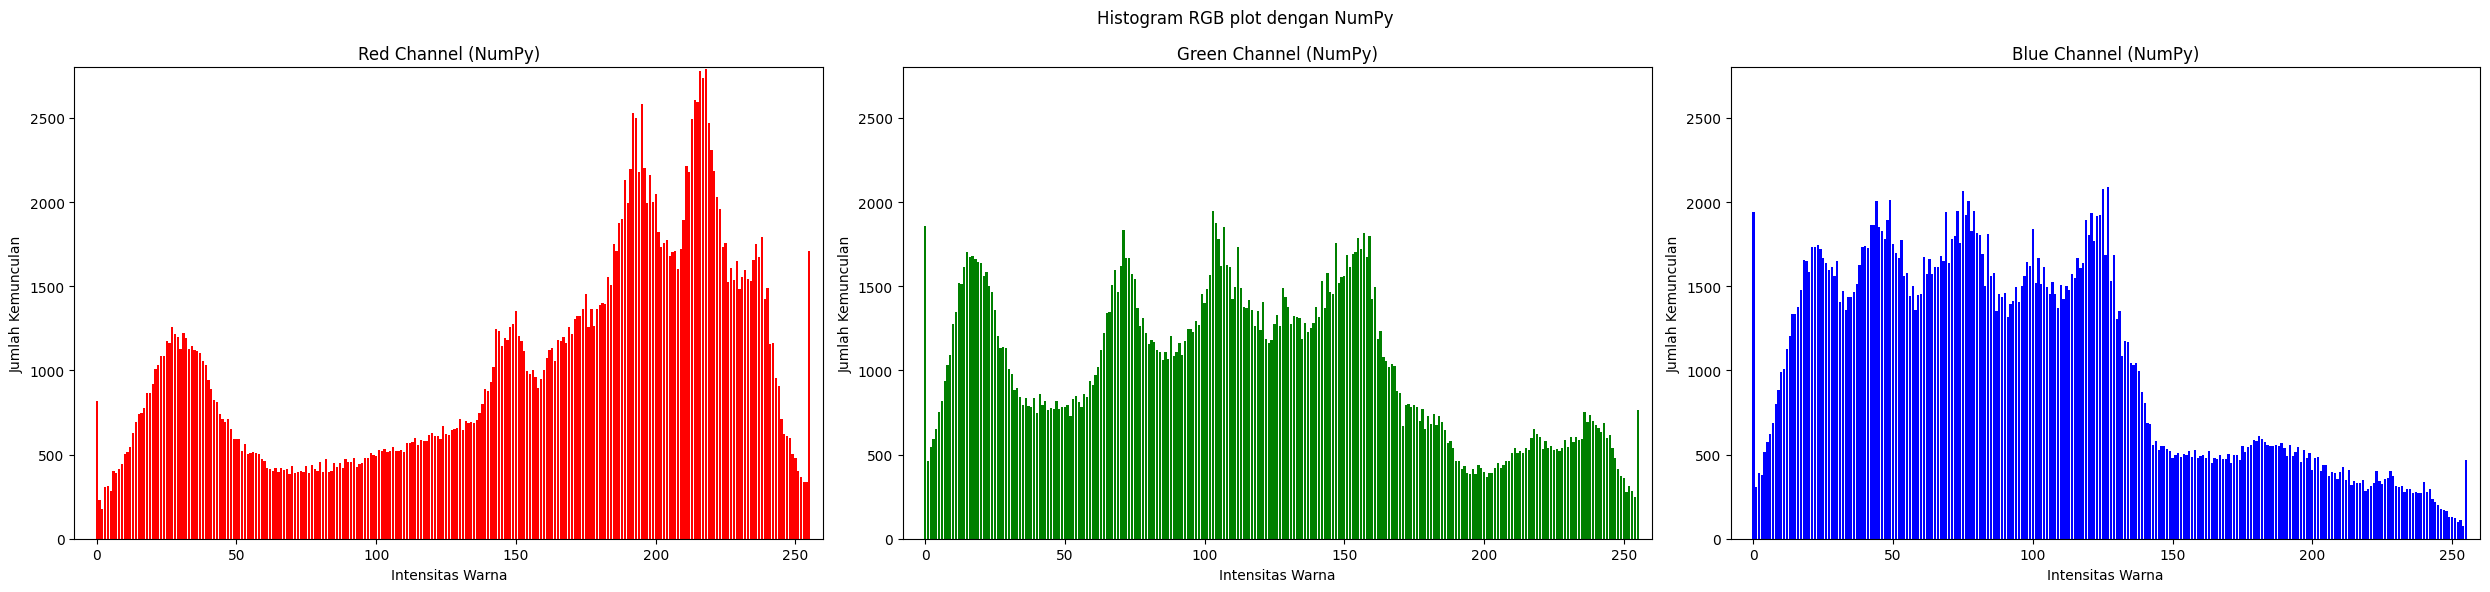

In [ ]:
# Nomor 4
from numpy import histogram

plt.figure(figsize=(25, 6))
plt.suptitle('Histogram RGB plot dengan NumPy')

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
channels_np = cv.split(image_rgb)

histograms_np = [np.histogram(channel, bins=256, range=(0, 256))[0] for channel in channels_np]

for i, histogram in enumerate(histograms_np):
    plt.subplot(1, 3, i + 1)
    plt.bar(np.arange(256), histogram, color=colors[i])
    plt.title(f'{channel_names[i]} Channel (NumPy)')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')
    plt.xlim([-8, 260])
    plt.ylim([0, 2800])

plt.tight_layout()
plt.show()

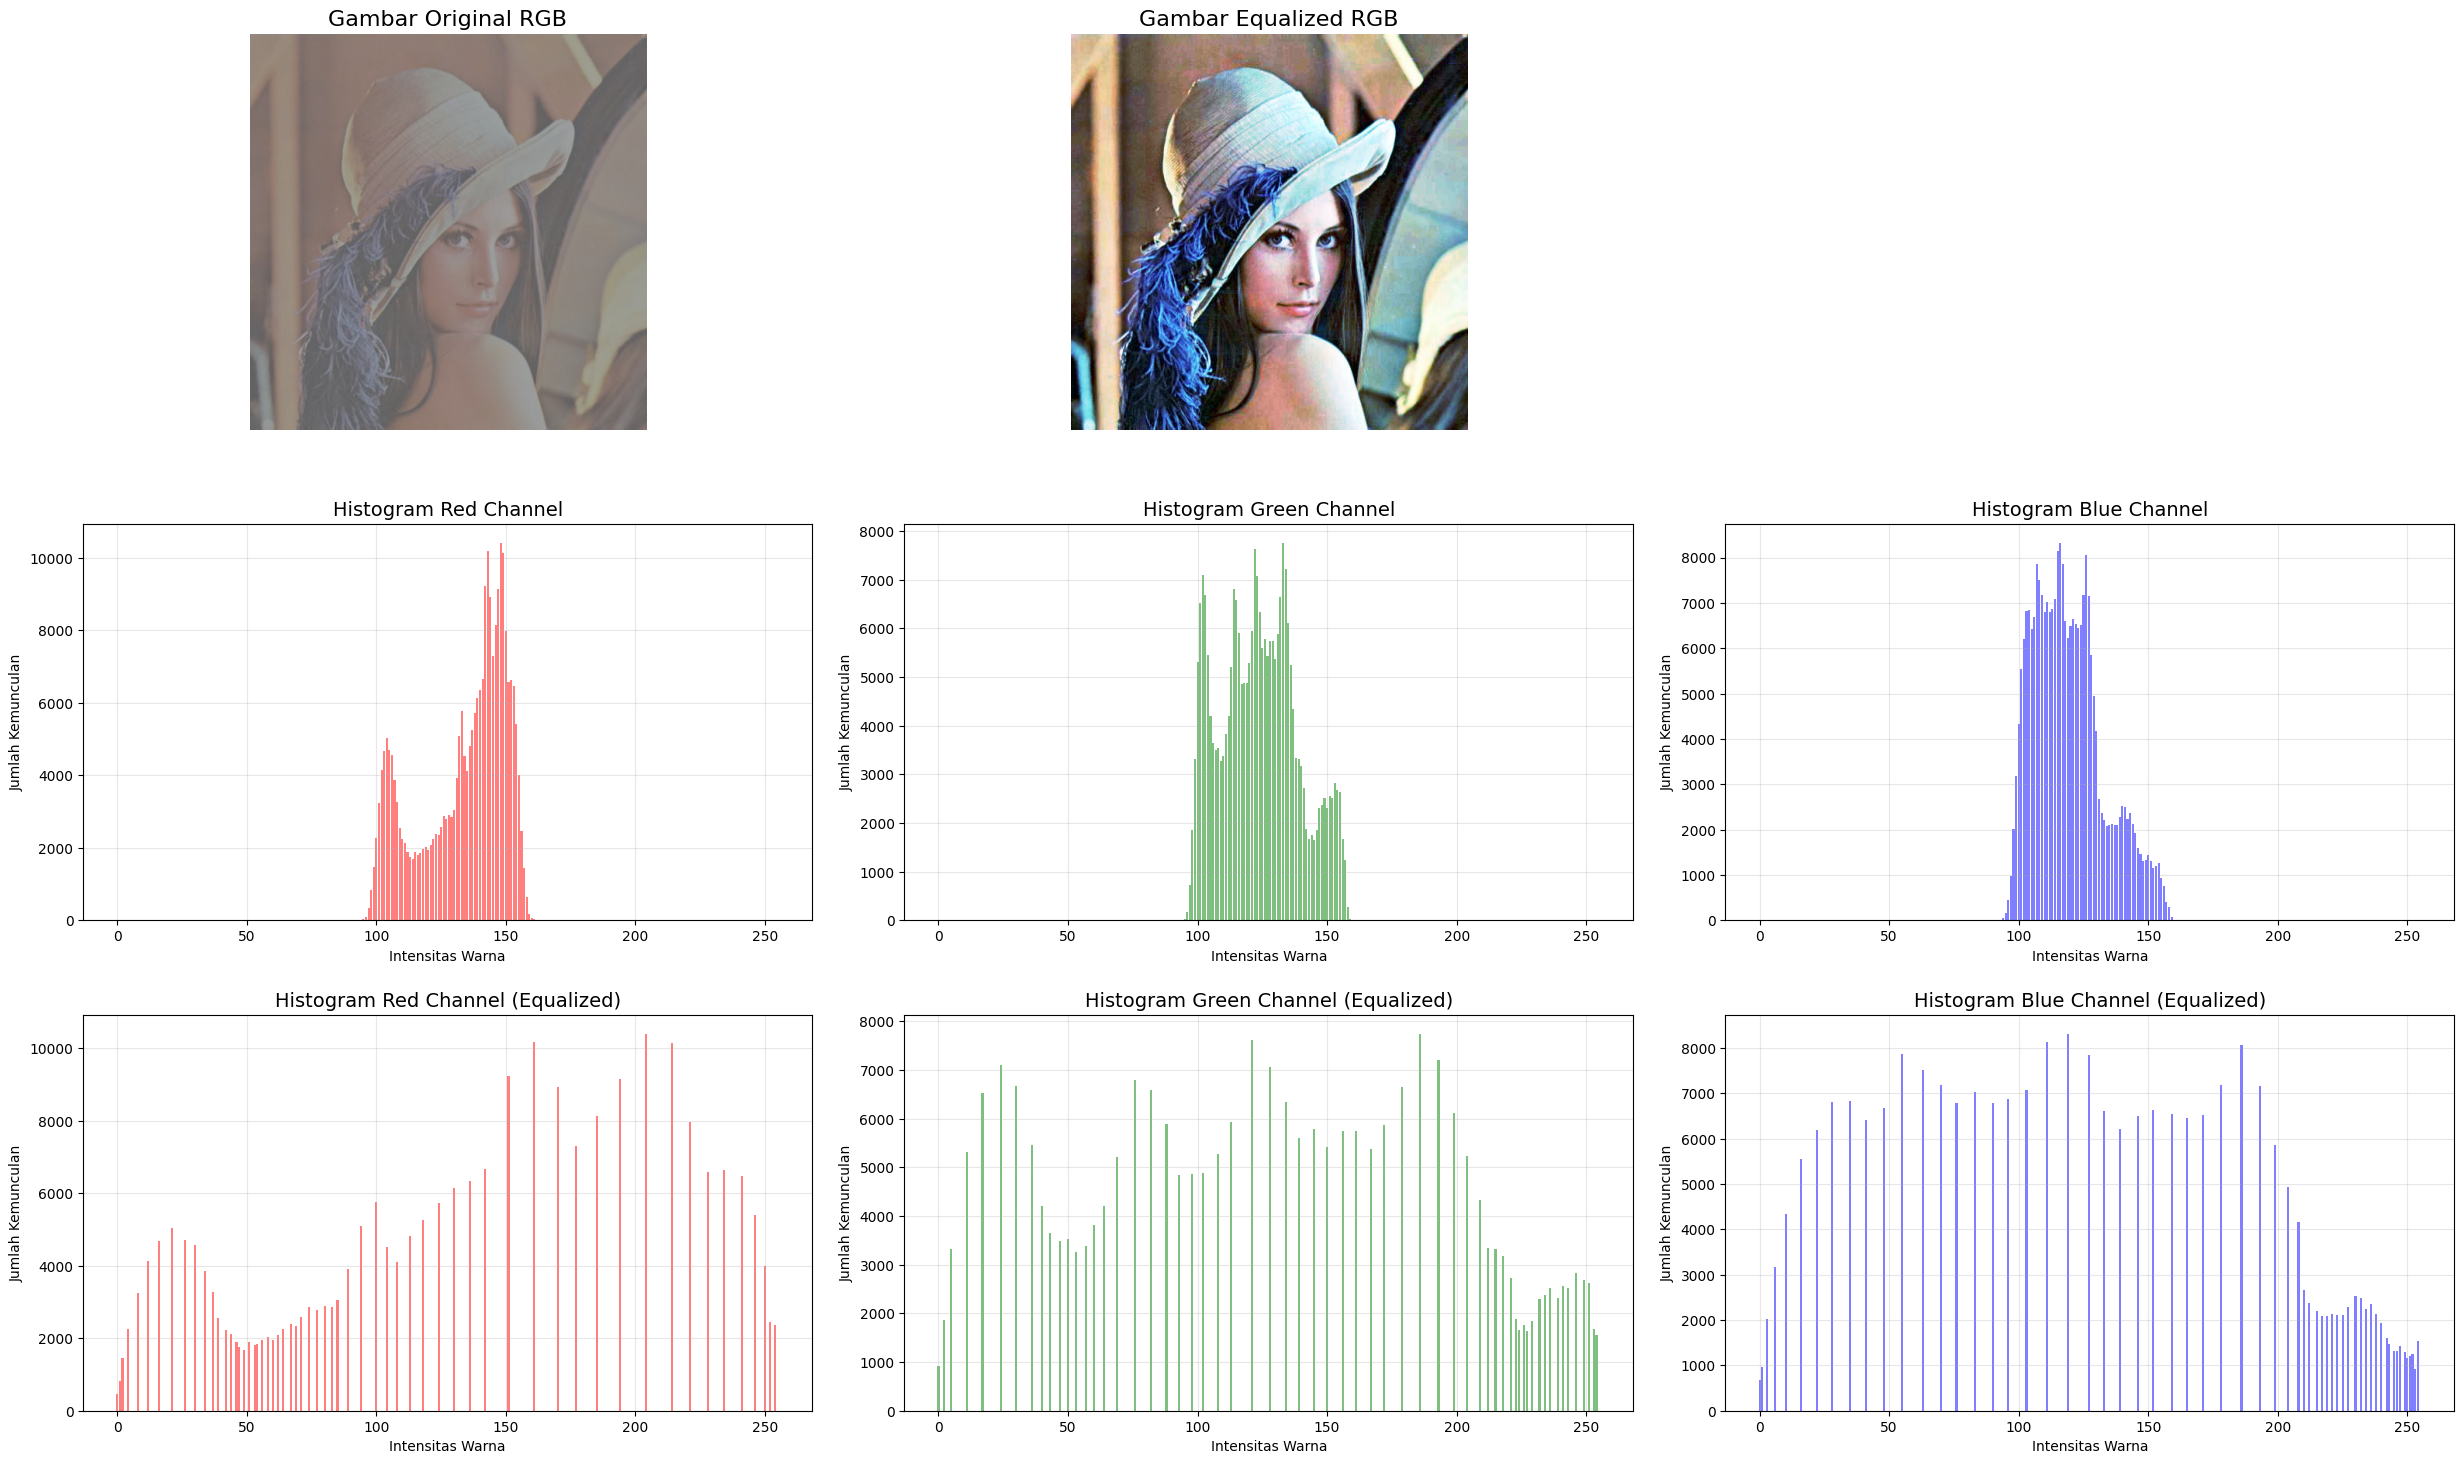

In [3]:
import cv2
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

# Step 1: Input image
img = cv2.imread('/content/drive/MyDrive/Week2/Images/lena_lc.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Memisahkan channel RGB
r, g, b = cv2.split(img)

# Step 2: Menghitung frekuensi (Histogram) untuk tiap channel
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256]).flatten()
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256]).flatten()
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256]).flatten()

# Step 3: Penjumlahan kumulatif dari frekuensi
cum_r = np.cumsum(hist_r)
cum_g = np.cumsum(hist_g)
cum_b = np.cumsum(hist_b)

# Step 4: Normalisasi kumulatif frekuensi
num_pixels = r.size  # Total jumlah pixel
cum_r_norm = (cum_r / num_pixels) * 255  # Normalisasi pada skala 0-255
cum_g_norm = (cum_g / num_pixels) * 255
cum_b_norm = (cum_b / num_pixels) * 255

# Step 5: Implementasi rumus K0 (Mapping nilai pixel setelah equalization)
r_eq = cum_r_norm[r].astype(np.uint8)
g_eq = cum_g_norm[g].astype(np.uint8)
b_eq = cum_b_norm[b].astype(np.uint8)

# Step 6: Transformasi kembali menjadi citra
img_eq = cv2.merge([r_eq, g_eq, b_eq])

# Menampilkan hasil dan histogram

plt.figure(figsize=(25, 15))
gs = GridSpec(3, 3, height_ratios=[1, 1, 1])

# Baris 1: Gambar asli dan hasil equalization
ax0 = plt.subplot(gs[0, 0])
ax0.imshow(img)
ax0.set_title('Gambar Original RGB', fontsize=16)
ax0.axis('off')

ax1 = plt.subplot(gs[0, 1])
ax1.imshow(img_eq)
ax1.set_title('Gambar Equalized RGB', fontsize=16)
ax1.axis('off')

# Baris 2: Histogram channel sebelum equalization
ax2 = plt.subplot(gs[1, 0])
ax2.bar(range(256), hist_r, color='red', alpha=0.5)
ax2.set_title('Histogram Red Channel', fontsize=14)
ax2.set_xlabel('Intensitas Warna')
ax2.set_ylabel('Jumlah Kemunculan')
ax2.grid(True, alpha=0.3)

ax3 = plt.subplot(gs[1, 1])
ax3.bar(range(256), hist_g, color='green', alpha=0.5)
ax3.set_title('Histogram Green Channel', fontsize=14)
ax3.set_xlabel('Intensitas Warna')
ax3.set_ylabel('Jumlah Kemunculan')
ax3.grid(True, alpha=0.3)

ax4 = plt.subplot(gs[1, 2])
ax4.bar(range(256), hist_b, color='blue', alpha=0.5)
ax4.set_title('Histogram Blue Channel', fontsize=14)
ax4.set_xlabel('Intensitas Warna')
ax4.set_ylabel('Jumlah Kemunculan')
ax4.grid(True, alpha=0.3)

# Baris 3: Histogram channel setelah equalization
hist_r_eq = cv2.calcHist([r_eq], [0], None, [256], [0, 256]).flatten()
hist_g_eq = cv2.calcHist([g_eq], [0], None, [256], [0, 256]).flatten()
hist_b_eq = cv2.calcHist([b_eq], [0], None, [256], [0, 256]).flatten()

ax5 = plt.subplot(gs[2, 0])
ax5.bar(range(256), hist_r_eq, color='red', alpha=0.5)
ax5.set_title('Histogram Red Channel (Equalized)', fontsize=14)
ax5.set_xlabel('Intensitas Warna')
ax5.set_ylabel('Jumlah Kemunculan')
ax5.grid(True, alpha=0.3)

ax6 = plt.subplot(gs[2, 1])
ax6.bar(range(256), hist_g_eq, color='green', alpha=0.5)
ax6.set_title('Histogram Green Channel (Equalized)', fontsize=14)
ax6.set_xlabel('Intensitas Warna')
ax6.set_ylabel('Jumlah Kemunculan')
ax6.grid(True, alpha=0.3)

ax7 = plt.subplot(gs[2, 2])
ax7.bar(range(256), hist_b_eq, color='blue', alpha=0.5)
ax7.set_title('Histogram Blue Channel (Equalized)', fontsize=14)
ax7.set_xlabel('Intensitas Warna')
ax7.set_ylabel('Jumlah Kemunculan')
ax7.grid(True, alpha=0.3)

# Menampilkan hasil
plt.tight_layout(pad=2.0)
plt.show()

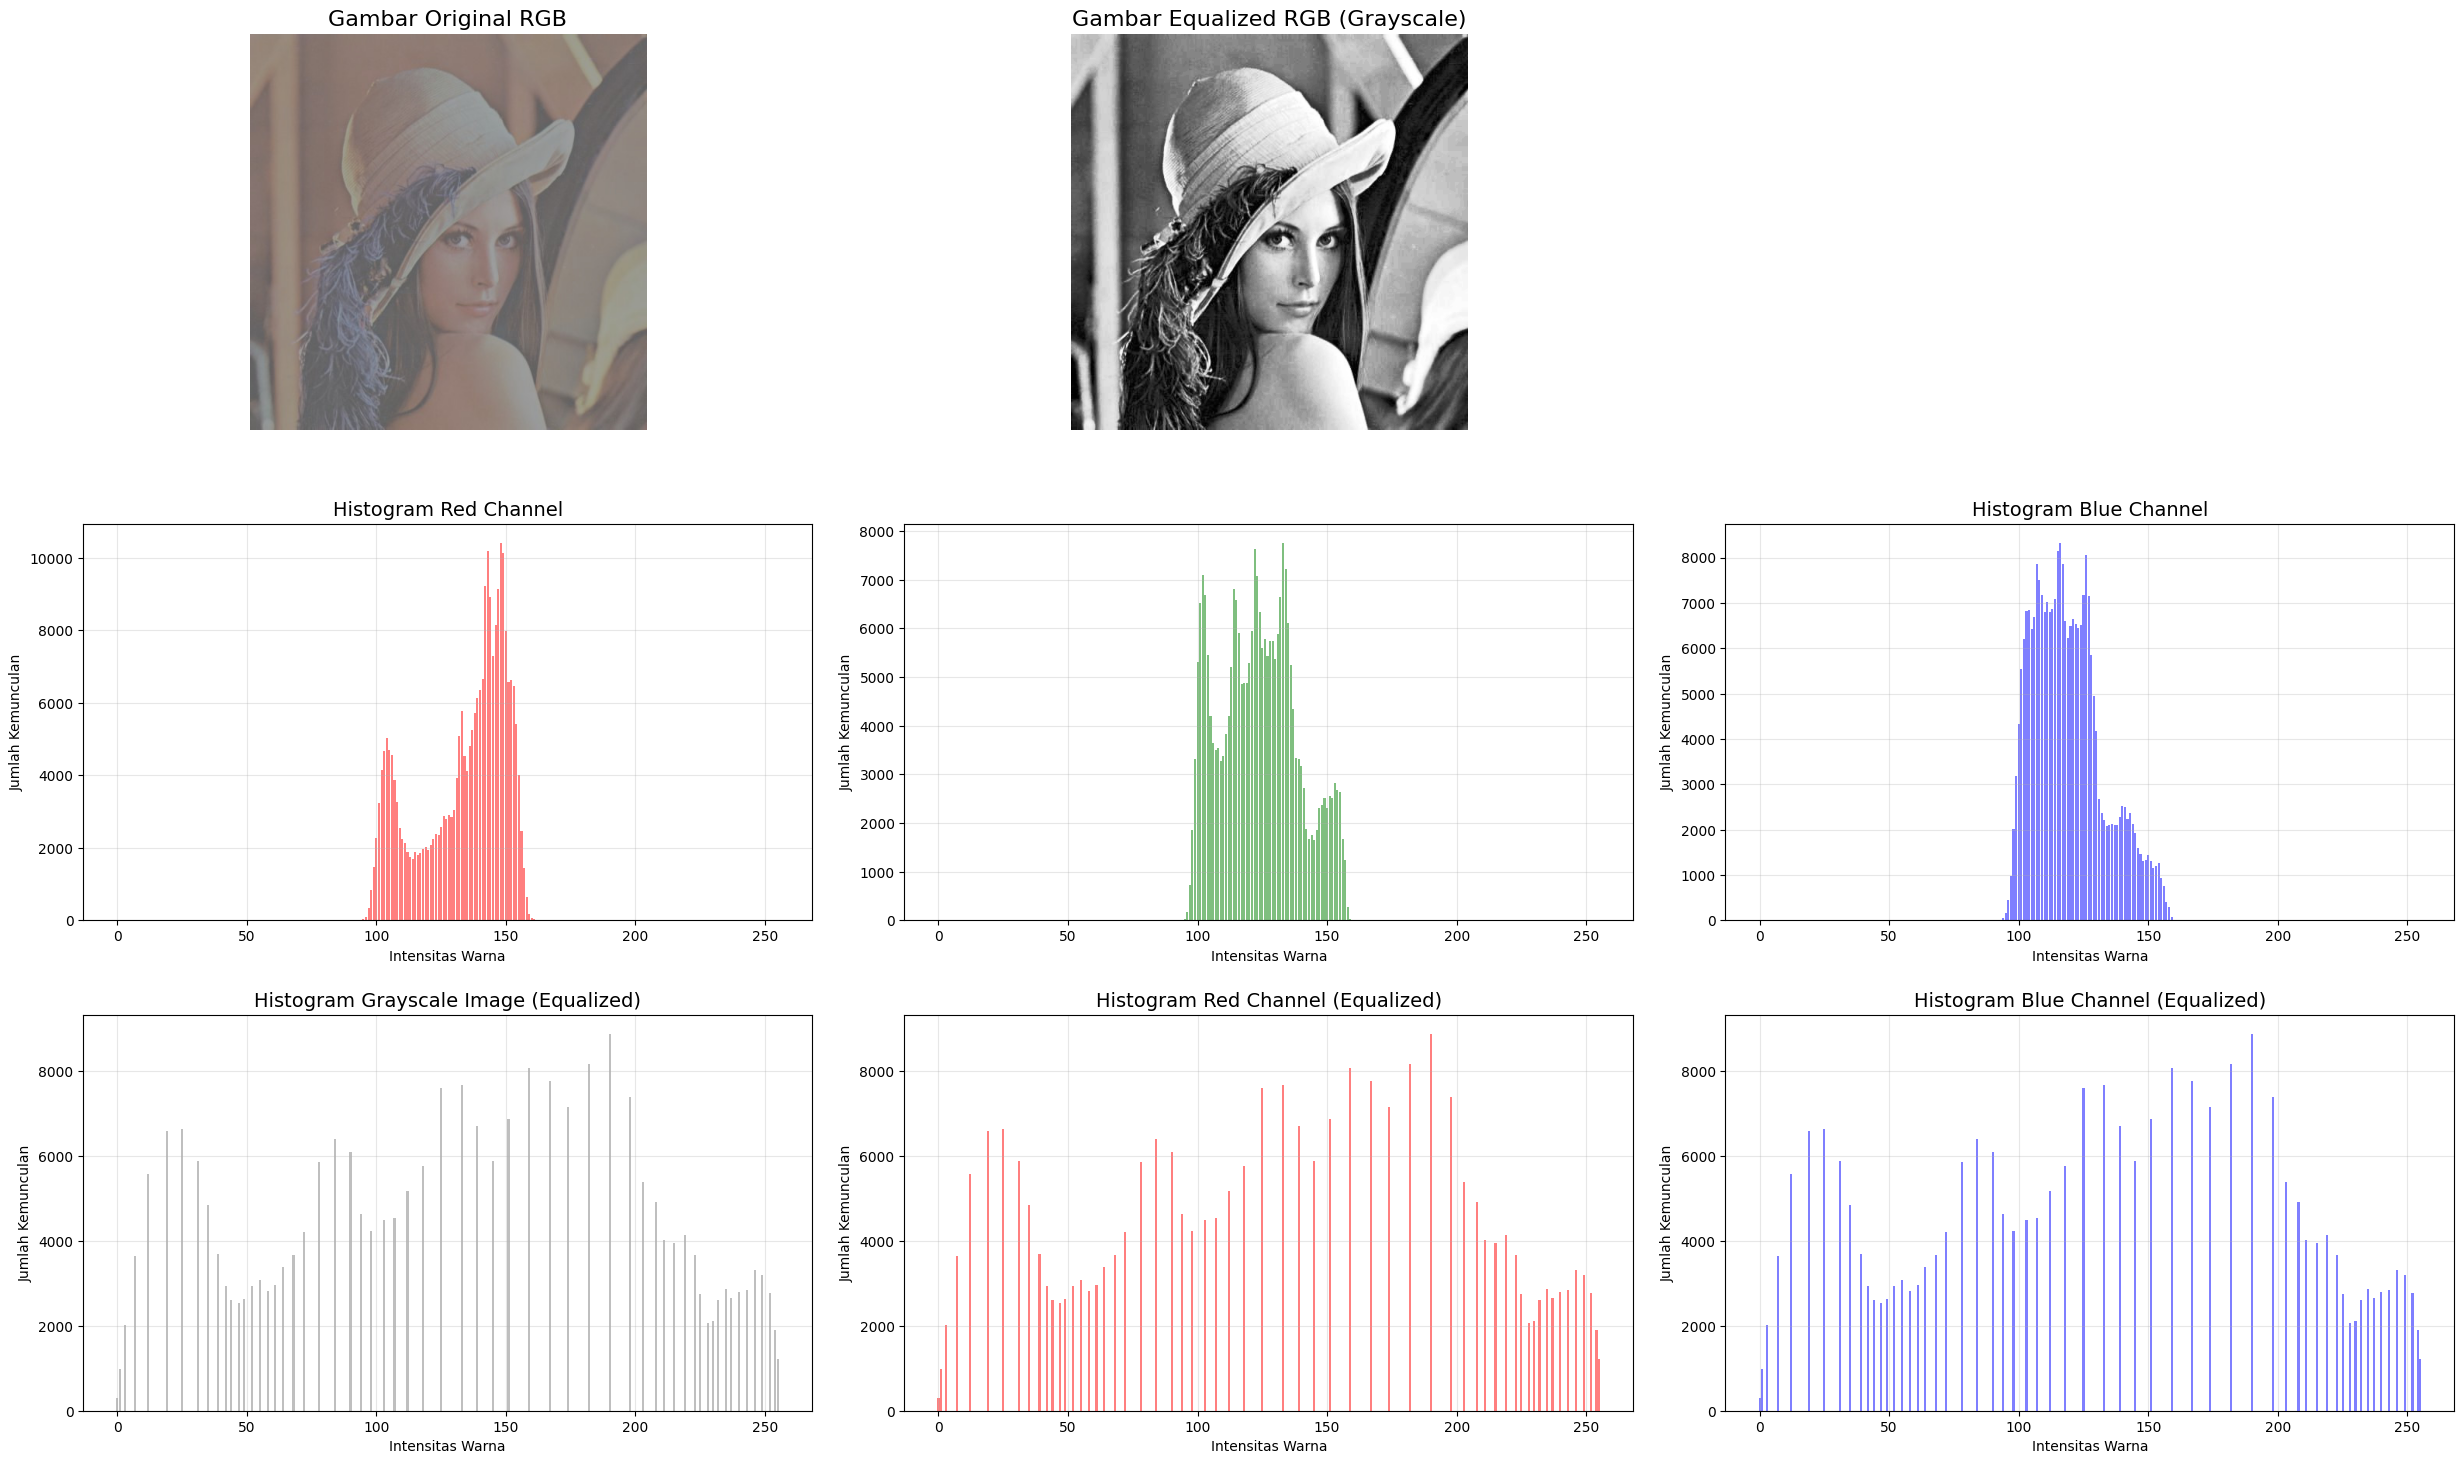

In [ ]:
# Nomor 6
img = cv2.imread('/content/drive/MyDrive/Week2/Images/lena_lc.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray_eq = cv2.equalizeHist(img_gray)

img_eq = cv2.cvtColor(img_gray_eq, cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(25, 15))
gs = GridSpec(3, 3, height_ratios=[1, 1, 1])

# Baris 1
ax0 = plt.subplot(gs[0, 0])
ax0.imshow(img_rgb)
ax0.set_title('Gambar Original RGB', fontsize=16)
ax0.axis('off')

ax1 = plt.subplot(gs[0, 1])
ax1.imshow(img_eq)
ax1.set_title('Gambar Equalized RGB (Grayscale)', fontsize=16)
ax1.axis('off')

# Baris 2
r, g, b = cv2.split(img_rgb)

ax2 = plt.subplot(gs[1, 0])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
ax2.bar(range(256), hist_r.flatten(), color='red', alpha=0.5)
ax2.set_title('Histogram Red Channel', fontsize=14)
ax2.set_xlabel('Intensitas Warna')
ax2.set_ylabel('Jumlah Kemunculan')
ax2.grid(True, alpha=0.3)

ax3 = plt.subplot(gs[1, 1])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
ax3.bar(range(256), hist_g.flatten(), color='green', alpha=0.5)
ax3.set_xlabel('Intensitas Warna')
ax3.set_ylabel('Jumlah Kemunculan')
ax3.grid(True, alpha=0.3)

ax4 = plt.subplot(gs[1, 2])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
ax4.bar(range(256), hist_b.flatten(), color='blue', alpha=0.5)
ax4.set_title('Histogram Blue Channel', fontsize=14)
ax4.set_xlabel('Intensitas Warna')
ax4.set_ylabel('Jumlah Kemunculan')
ax4.grid(True, alpha=0.3)

# Baris 3
ax5 = plt.subplot(gs[2, 0])
hist_gray_eq = cv2.calcHist([img_gray_eq], [0], None, [256], [0, 256])
ax5.bar(range(256), hist_gray_eq.flatten(), color='gray', alpha=0.5)
ax5.set_title('Histogram Grayscale Image (Equalized)', fontsize=14)
ax5.set_xlabel('Intensitas Warna')
ax5.set_ylabel('Jumlah Kemunculan')
ax5.grid(True, alpha=0.3)

ax6 = plt.subplot(gs[2, 1])
hist_eq_r = cv2.calcHist([img_eq[:, :, 0]], [0], None, [256], [0, 256])
ax6.bar(range(256), hist_eq_r.flatten(), color='red', alpha=0.5)
ax6.set_title('Histogram Red Channel (Equalized)', fontsize=14)
ax6.set_xlabel('Intensitas Warna')
ax6.set_ylabel('Jumlah Kemunculan')
ax6.grid(True, alpha=0.3)

ax7 = plt.subplot(gs[2, 2])
hist_eq_b = cv2.calcHist([img_eq[:, :, 2]], [0], None, [256], [0, 256])
ax7.bar(range(256), hist_eq_b.flatten(), color='blue', alpha=0.5)
ax7.set_title('Histogram Blue Channel (Equalized)', fontsize=14)
ax7.set_xlabel('Intensitas Warna')
ax7.set_ylabel('Jumlah Kemunculan')
ax7.grid(True, alpha=0.3)

plt.tight_layout(pad=2.0)
plt.show()

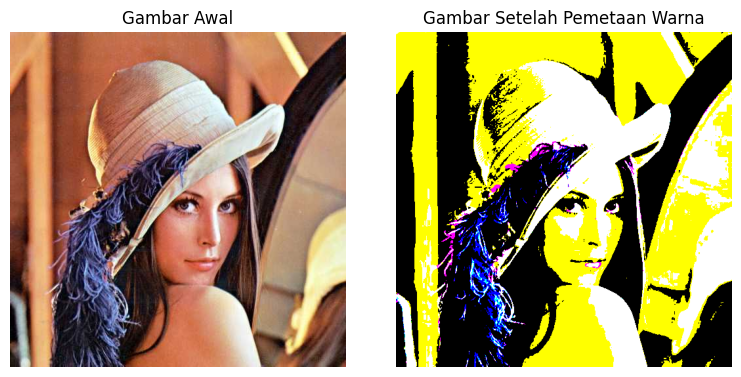

In [ ]:
# Nomor 7
img = cv2.imread('/content/drive/MyDrive/Week2/Images/lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

list_color = np.array([
    [0, 0, 0],       # hitam
    [0, 255, 0],     # hijau
    [255, 255, 0],   # kuning
    [0, 0, 255],     # biru
    [0, 255, 255],   # cyan
    [255, 0, 255],   # magenta
    [255, 255, 255], # putih
])

def find_color(img, list_color):
    diff = img[:, :, None, :] - list_color[None, None, :, :]
    distances = np.linalg.norm(diff, axis=-1)
    color_map = np.argmin(distances, axis=-1)
    return list_color[color_map]

output_img = find_color(img, list_color)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Gambar Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_img)
plt.title('Gambar Setelah Pemetaan Warna')
plt.axis('off')

plt.tight_layout(pad=2.0)
plt.show()

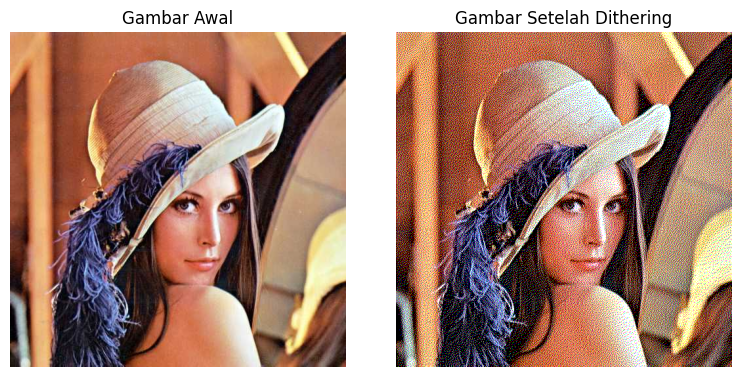

In [ ]:
# Nomor 8
img = cv2.imread('/content/drive/MyDrive/Week2/Images/lena.jpg')

def img_dithering(channel):
    height, width = channel.shape
    dithering_channel = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            ori_pixel = channel[y, x]
            new_pixel = 255 if ori_pixel > 127 else 0
            dithering_channel[y, x] = new_pixel
            error = ori_pixel - new_pixel

            if x < width - 1:
                channel[y, x + 1] += error * 7 / 16
            if x > 0 and y < height - 1:
                channel[y + 1, x - 1] += error * 3 / 16
            if y < height - 1:
                channel[y + 1, x] += error * 5 / 16
            if x < width - 1 and y < height - 1:
                channel[y + 1, x + 1] += error * 1 / 16

    return dithering_channel

b_channel, g_channel, r_channel = cv2.split(img)

dithered_b = img_dithering(b_channel.astype(float))
dithered_g = img_dithering(g_channel.astype(float))
dithered_r = img_dithering(r_channel.astype(float))

dithered_img = cv2.merge([dithered_b, dithered_g, dithered_r])

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dithered_img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Setelah Dithering')
plt.axis('off')

plt.tight_layout(pad=2.0)
plt.show()

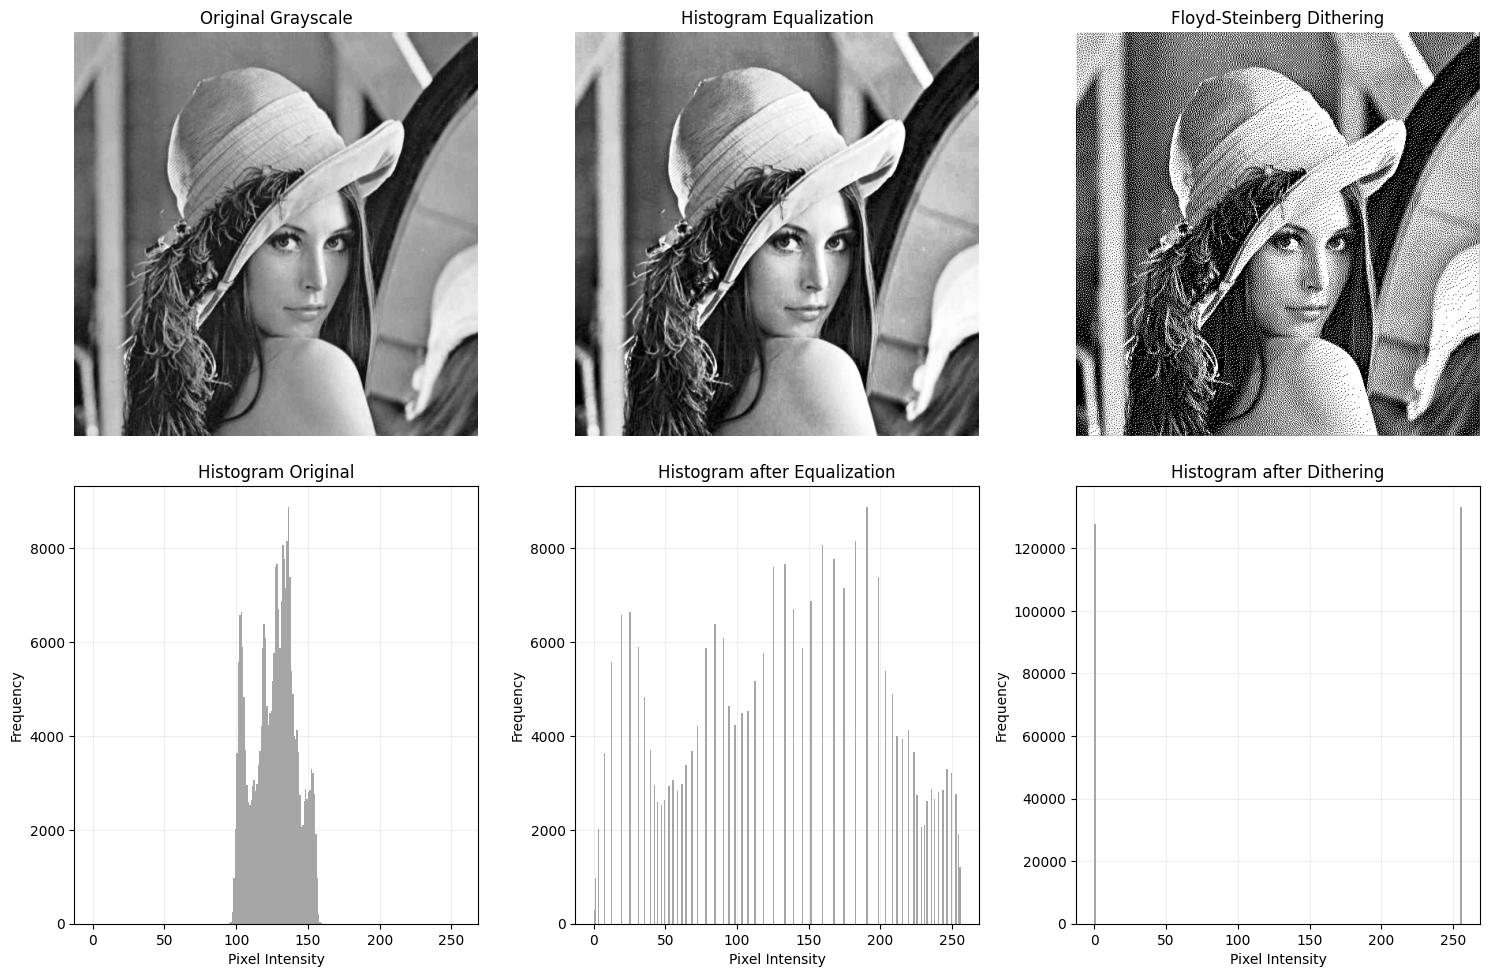

In [ ]:
# Nomor 9

def image_dithering(img):
    height, width = img.shape
    img_dither = img.astype(np.float64)

    for y in range(height - 1):
        for x in range(width - 1):
            ori_pixel = img_dither[y, x]

            new_pixel = 255 if ori_pixel > 127 else 0
            img_dither[y, x] = new_pixel

            error = ori_pixel - new_pixel

            img_dither[y, x + 1] += error * 7 / 16
            if x > 0:
                img_dither[y + 1, x - 1] += error * 3 / 16
            img_dither[y + 1, x] += error * 5 / 16
            img_dither[y + 1, x + 1] += error * 1 / 16

    return np.clip(img_dither, 0, 255).astype(np.uint8)

img = cv2.imread('/content/drive/MyDrive/Week2/Images/lena_lc.jpg', cv2.IMREAD_GRAYSCALE)

img_eq = cv2.equalizeHist(img)

img_dither = image_dithering(img_eq)

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(15, 10))

# Baris 1
ax0.imshow(img, cmap='gray')
ax0.set_title('Original Grayscale')
ax0.axis('off')

ax1.imshow(img_eq, cmap='gray')
ax1.set_title('Histogram Equalization')
ax1.axis('off')

ax2.imshow(img_dither, cmap='gray')
ax2.set_title('Floyd-Steinberg Dithering')
ax2.axis('off')

# Baris 2
ax3.hist(img.ravel(), 256, [0, 256], color='gray', alpha=0.7)
ax3.set_title('Histogram Original')
ax3.set_xlabel('Pixel Intensity')
ax3.set_ylabel('Frequency')
ax3.grid(True, alpha=0.2)

ax4.hist(img_eq.ravel(), 256, [0, 256], color='gray', alpha=0.7)
ax4.set_title('Histogram after Equalization')
ax4.set_xlabel('Pixel Intensity')
ax4.set_ylabel('Frequency')
ax4.grid(True, alpha=0.2)

ax5.hist(img_dither.ravel(), 256, [0, 256], color='gray', alpha=0.7)
ax5.set_title('Histogram after Dithering')
ax5.set_xlabel('Pixel Intensity')
ax5.set_ylabel('Frequency')
ax5.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()